# Logistic Regression Model

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics, model_selection
import random

## Preprocess the Data
### Load the Data

In [2]:
data = pd.read_csv('training.csv')
test = pd.read_csv('test.csv')

### Handling datetime
* spilt datetime into day, month and year for training

In [3]:
new = data["Date"].str.split("-", n = 2, expand = True) 

new.columns = ['Day', 'Month', 'Year']
new.loc[new['Month'] == 'Jan', ['Month']] = 1
new.loc[new['Month'] == 'Feb', ['Month']] = 2
new.loc[new['Month'] == 'Mar', ['Month']] = 3
new.loc[new['Month'] == 'Apr', ['Month']] = 4
new.loc[new['Month'] == 'May', ['Month']] = 5
new.loc[new['Month'] == 'Jun', ['Month']] = 6
new.loc[new['Month'] == 'Jul', ['Month']] = 7
new.loc[new['Month'] == 'Aug', ['Month']] = 8
new.loc[new['Month'] == 'Sep', ['Month']] = 9
new.loc[new['Month'] == 'Oct', ['Month']] = 10
new.loc[new['Month'] == 'Nov', ['Month']] = 11
new.loc[new['Month'] == 'Dec', ['Month']] = 12

data = data.drop('Date', axis=1)
data = pd.concat([new, data], axis=1)

new2 = test["Date"].str.split("-", n = 2, expand = True) 

new2.columns = ['Day', 'Month', 'Year']
new2.loc[new2['Month'] == 'Jan', ['Month']] = 1
new2.loc[new2['Month'] == 'Feb', ['Month']] = 2
new2.loc[new2['Month'] == 'Mar', ['Month']] = 3
new2.loc[new2['Month'] == 'Apr', ['Month']] = 4
new2.loc[new2['Month'] == 'May', ['Month']] = 5
new2.loc[new2['Month'] == 'Jun', ['Month']] = 6
new2.loc[new2['Month'] == 'Jul', ['Month']] = 7
new2.loc[new2['Month'] == 'Aug', ['Month']] = 8
new2.loc[new2['Month'] == 'Sep', ['Month']] = 9
new2.loc[new2['Month'] == 'Oct', ['Month']] = 10
new2.loc[new2['Month'] == 'Nov', ['Month']] = 11
new2.loc[new2['Month'] == 'Dec', ['Month']] = 12

test = test.drop('Date', axis=1)
test = pd.concat([new2, test], axis=1)

### Specifying the ups and downs
* Subtract close price to open price.
* If the result is positive(up), remark it as 1
* Otherwise, remark it as 0
* Up shift the row to predict the ups and downs tomorrow

In [4]:
diff = pd.DataFrame(data['Close Price'] - data['Open Price'])
diff.columns = ['Diff']
diff = diff.drop(diff.index[0]).reset_index(drop=True)

data = pd.concat([data, diff], axis=1)
data.loc[data['Diff'] >= 0, ['Diff']] = 1
data.loc[data['Diff'] < 0, ['Diff']] = 0
data = data.fillna(0)

diff2 = pd.DataFrame(test['Close Price'] - test['Open Price'])
diff2.columns = ['Diff']
diff2 = diff2.drop(diff2.index[0]).reset_index(drop=True)

test = pd.concat([test, diff2], axis=1)
test.loc[test['Diff'] >= 0, ['Diff']] = 1
test.loc[test['Diff'] < 0, ['Diff']] = 0
test = test.fillna(0)

In [5]:
data.head(5)

,Day,Month,Year,Open Price,Close Price,High Price,Low Price,Volume,Diff
0,02,1,2009,902.99,931.80,934.73,899.35,4048270080,0.0
1,05,1,2009,929.17,927.45,936.63,919.53,5413910016,1.0
2,06,1,2009,931.17,934.70,943.85,927.28,5392620032,0.0
3,07,1,2009,927.45,906.65,927.45,902.37,4704940032,1.0
4,08,1,2009,905.73,909.73,910.00,896.81,4991549952,0.0


In [6]:
x_train = data.loc[:, data.columns != 'Diff']
y_train = data.loc[:, data.columns == 'Diff']
x_test = test.loc[:, test.columns != 'Diff']
y_test = test.loc[:, test.columns == 'Diff']


## Data Visualization

In [7]:
def plot_feature(data, feature_name):
    plt.figure(figsize=(10, 3))
    plt.scatter(data[feature_name], data['Diff'])
    plt.xlabel(feature_name)
    plt.ylabel('Diff')
    plt.show()

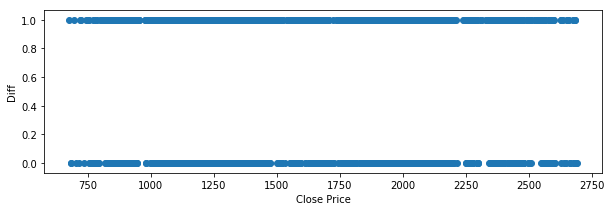

In [8]:
plot_feature(data, 'Close Price')

## Fit Baseline Model
### Evaluation

In [9]:
def evaluate(model, x_train, y_train, x_test, y_test):
    train_preds = model.predict(x_train)
    test_preds = model.predict(x_test)
    train_acc = metrics.accuracy_score(y_train, train_preds)
    test_acc = metrics.accuracy_score(y_test, test_preds)
    print('Train accuracy: %s' % train_acc)
    print('Test accuracy: %s' % test_acc)

## Gradient Descent Model(Baseline)

In [10]:
model_bl = linear_model.SGDClassifier(loss='log', max_iter=10000).fit(x_train, y_train)
evaluate(model_bl, x_train, y_train, x_test, y_test)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train accuracy: 0.4540636042402827
Test accuracy: 0.5


## Logistic Regression Model

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(x_train, y_train)
evaluate(clf, x_train, y_train, x_test, y_test)

Train accuracy: 0.5459363957597173
Test accuracy: 0.5


/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
